## Loading data

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

 87% 77.0M/89.0M [00:00<00:00, 109MB/s]
100% 89.0M/89.0M [00:00<00:00, 123MB/s]


In [5]:
!unzip /content/zomato-bangalore-restaurants.zip

Archive:  /content/zomato-bangalore-restaurants.zip
  inflating: zomato.csv              


In [142]:
import numpy as np
import pandas as pd

In [143]:
df = pd.read_csv('/content/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data preprocessing

In [144]:
df.shape

(51717, 17)

In [145]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [146]:
df = df.drop(columns = ['url','phone','dish_liked'])
df.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [147]:
df.dropna(how='any',inplace=True)

In [148]:
df.shape

(43533, 14)

In [149]:
df.duplicated().sum()

34

In [150]:
df.drop_duplicates(inplace=True)
df.shape

(43499, 14)

In [151]:
df = df.rename(columns = {'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
df.head(5)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       43499 non-null  object
 1   name          43499 non-null  object
 2   online_order  43499 non-null  object
 3   book_table    43499 non-null  object
 4   rate          43499 non-null  object
 5   votes         43499 non-null  int64 
 6   location      43499 non-null  object
 7   rest_type     43499 non-null  object
 8   cuisines      43499 non-null  object
 9   cost          43499 non-null  object
 10  reviews_list  43499 non-null  object
 11  menu_item     43499 non-null  object
 12  type          43499 non-null  object
 13  city          43499 non-null  object
dtypes: int64(1), object(13)
memory usage: 5.0+ MB


In [153]:
df['name'].nunique()

7112

In [154]:
# Converting the rate column to float type
df = df.loc[df['rate'] != 'NEW']
df = df.loc[df['rate'] != '-'].reset_index(drop = True)
slash = lambda x: x.replace('/5','') if type(x) == str else x
df['rate'] = df['rate'].apply(slash).str.strip().astype('float')

In [155]:
# Converting the cost column to float type
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)

In [156]:
df.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [157]:
restaurants = list(df['name'].unique())

In [158]:
# Converting reviews_list to lower case
df['reviews_list'] = df['reviews_list'].str.lower()

In [159]:
import string
remove_punc = string.punctuation

In [160]:
# removing punctuations from reviews
def remove_punctuation(text):
  return text.translate(str.maketrans('','',remove_punc))

In [161]:
df['reviews_list'] = df['reviews_list'].apply(lambda text: remove_punctuation(text))

In [162]:
# removing punctuations from cuisines
df['cuisines'] = df['cuisines'].apply(lambda text: remove_punctuation(text))

In [163]:
df[['reviews_list','cuisines']].head()

,reviews_list,cuisines
0,rated 40 ratedn a beautiful place to dine int...,North Indian Mughlai Chinese
1,rated 40 ratedn had been here for dinner with...,Chinese North Indian Thai
2,rated 30 ratedn ambience is not that good eno...,Cafe Mexican Italian
3,rated 40 ratedn great food and proper karnata...,South Indian North Indian
4,rated 40 ratedn very good restaurant in neigh...,North Indian Rajasthani


## Data Visualisation

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

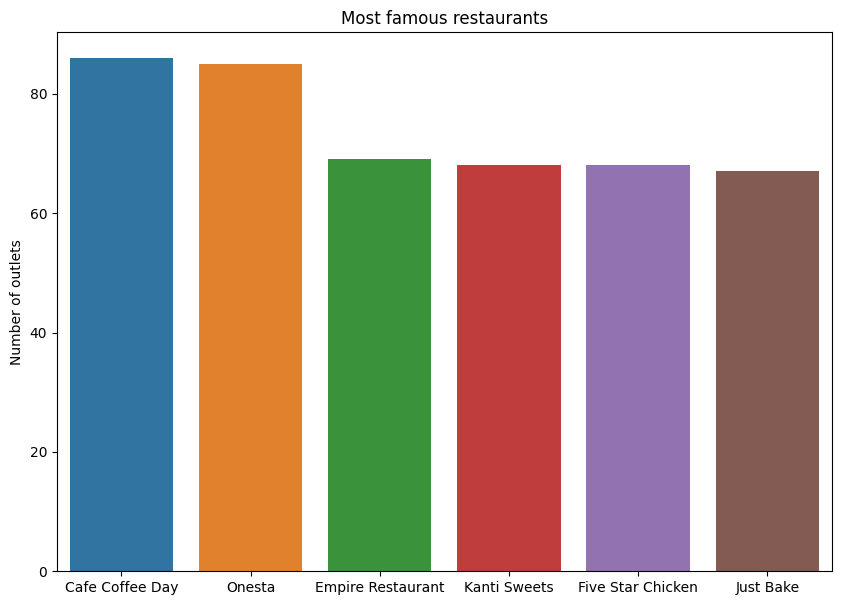

In [165]:
plt.figure(figsize = (10,7))
tsr = df['name'].value_counts()[:6]
sns.barplot(x = tsr.index, y = tsr, palette = 'tab10')
plt.title('Most famous restaurants')
plt.ylabel('Number of outlets')
plt.show()

<ipython-input-166-1fa0cb6a3a3b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'],kde = False, color = 'b', ax = ax, bins = 20);


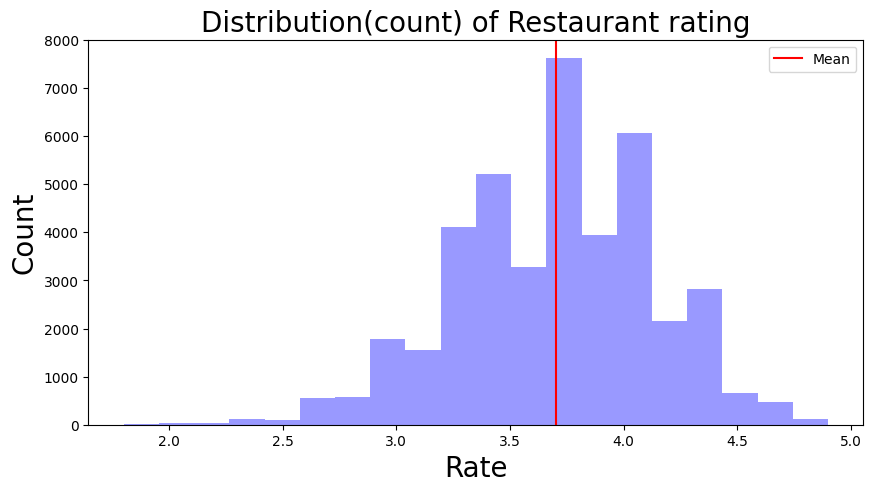

In [166]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))
sns.distplot(df['rate'],kde = False, color = 'b', ax = ax, bins = 20);
ax.axvline(df['rate'].mean(),0,1,color = 'r',label = 'Mean')
ax.legend()
ax.set_ylabel('Count',size = 20)
ax.set_xlabel('Rate',size = 20)
ax.set_title('Distribution(count) of Restaurant rating', size = 20)
plt.show()

## Creating the required dataset for recommendation system

In [168]:
# Group by 'name' column and calculate the mean of 'rate' column
grouped_df = df.groupby('name', as_index=False)['rate'].mean().round(2)

# Combine all reviews and cuisines for each unique name
combined_df = df.groupby('name', as_index=False).agg({'reviews_list': 'sum', 'cuisines': 'sum'})

# Merge the two dataframes on 'name' column
new_df = pd.merge(grouped_df, combined_df, on='name')

# Print the resulting dataframe
new_df.tail()


,name,rate,reviews_list,cuisines
6597,i-Bar - The Park Bangalore,3.80,rated 40 ratedn a fab place to hangout with f...,North Indian Chinese MediterraneanNorth Indian...
6598,iFruit Live Ice Creams,3.40,rated 40 ratedn the sharjah milkshake used to...,Ice CreamIce CreamIce CreamIce Cream
6599,iSpice Resto Cafe,3.70,rated 50 ratedn food 55 expertise in breakfa...,Cafe North Indian Chinese Fast FoodCafe North ...
6600,nu.tree,4.31,rated 40 ratedn i ordered their veg meal at o...,North Indian Healthy Food BeveragesNorth India...
6601,re:cess - Hilton Bangalore Embassy GolfLinks,4.10,rated 50 ratedn a big thanks for the last nig...,South Indian North Indian Continental European...


In [169]:
new_df.shape

(6602, 4)

In [170]:
new_df['tags'] = new_df['reviews_list'] + new_df['cuisines']
new_df.head()

,name,rate,reviews_list,cuisines,tags
0,#FeelTheROLL,3.4,rated 50 ratedn had an egg chicken roll and a...,Fast FoodFast Food,rated 50 ratedn had an egg chicken roll and a...
1,#L-81 Cafe,3.9,rated 40 ratedn this little cafe is set in a ...,Fast Food BeveragesFast Food BeveragesFast Foo...,rated 40 ratedn this little cafe is set in a ...
2,#refuel,3.7,rated 30 ratedn we ordered for schezwan panee...,Cafe BeveragesCafe BeveragesCafe Beverages,rated 30 ratedn we ordered for schezwan panee...
3,1000 B.C,3.2,rated 10 ratedn ordered a chicken subwich at ...,Arabian Sandwich Rolls BurgerArabian Sandwich ...,rated 10 ratedn ordered a chicken subwich at ...
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.7,rated 10 ratedn they are frod they have close...,Biryani North IndianBiryani North IndianBiryan...,rated 10 ratedn they are frod they have close...


In [171]:
new_df = new_df.drop(columns = ['reviews_list','cuisines'])
new_df.head()

,name,rate,tags
0,#FeelTheROLL,3.4,rated 50 ratedn had an egg chicken roll and a...
1,#L-81 Cafe,3.9,rated 40 ratedn this little cafe is set in a ...
2,#refuel,3.7,rated 30 ratedn we ordered for schezwan panee...
3,1000 B.C,3.2,rated 10 ratedn ordered a chicken subwich at ...
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.7,rated 10 ratedn they are frod they have close...


In [172]:
new_df['cost'] = df['cost']
new_df.head()

,name,rate,tags,cost
0,#FeelTheROLL,3.4,rated 50 ratedn had an egg chicken roll and a...,800.0
1,#L-81 Cafe,3.9,rated 40 ratedn this little cafe is set in a ...,800.0
2,#refuel,3.7,rated 30 ratedn we ordered for schezwan panee...,800.0
3,1000 B.C,3.2,rated 10 ratedn ordered a chicken subwich at ...,300.0
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.7,rated 10 ratedn they are frod they have close...,600.0


## Recommendation system

In [173]:
# Importing required modules
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [174]:
cv = CountVectorizer(max_features=5000,stop_words='english')

In [175]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [176]:
vector.shape

(6602, 5000)

In [177]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.70830443, 0.07140126, ..., 0.02828206, 0.73854214,
        0.96928952],
       [0.70830443, 1.        , 0.28284807, ..., 0.15293737, 0.73455955,
        0.75716294],
       [0.07140126, 0.28284807, 1.        , ..., 0.13747743, 0.39372013,
        0.12421214],
       ...,
       [0.02828206, 0.15293737, 0.13747743, ..., 1.        , 0.18338875,
        0.06283396],
       [0.73854214, 0.73455955, 0.39372013, ..., 0.18338875, 1.        ,
        0.78096144],
       [0.96928952, 0.75716294, 0.12421214, ..., 0.06283396, 0.78096144,
        1.        ]])

In [178]:
def recommend(restaurant):
    index = new_df[new_df['name'] == restaurant].index[0]
    distances = sorted(enumerate(similarity[index]), reverse=True, key=lambda x: x[1])
    for i in distances[1:11]:
        print(new_df.iloc[i[0]]['name'])

In [179]:
recommend('Jalsa')

The Black Pearl
Fenny's Lounge And Kitchen
Crawl Street
Vapour Brewpub and Diner
Funjabi
The Hidden Home
Hangover
Sotally Tober
Vapour Pub & Brewery
Urban Tamaasha


In [180]:
recommend('San Churro Cafe')

Cafe Mondo
Sidewalk Cafe - Nahar's Heritage Hotel
Caffe Pascucci
The French Loaf
Three Dots & A Dash
Cafe Pink Pajamas
Mr. Beans - Home Cafe
Cafe Happytizing
House Of Commons
Dyu Art Cafe


In [181]:
recommend('Grand Village')

Curry with a 'K' - St. Mark's Hotel
24th Main
1947
Atithi
Flavours - Octave Hotel & Spa
Elmas Restaurant
Kakal Kai Ruchi
Dal Tadkaa
Citrus Cafe - Lemon Tree Hotel
Pepper's - The Palladium


In [182]:
recommend('#FeelTheROLL')

Happy Hours
Cafe Aladdin
Dessi Cuppa
Ilyazsab The House Of Chicken
ANTIGRAVITY
7th Heaven
Ackley Kitchen
Jay Bhavani
Shizusan Shophouse & Bar
Bloomsbury's Global Kitchen & Bakehouse


In [183]:
recommend('1000 B.C')

Subway
Apna Hotel
North Wale Restaurant
Bombay Sandwich Company
This Cafe Has No Name Cafe
Silver Spoon Restaurant
Raenss Cafe
Hungry Paunch
Food Point
Chakh Le India


In [184]:
import pickle

In [186]:
pickle.dump(new_df,open('restaurants.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))